In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import itertools

In [34]:
data=pd.read_csv("/Users/nirajsubedi/Desktop/ndp test data/large data/__MACOSX/diabetes.csv") 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [36]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


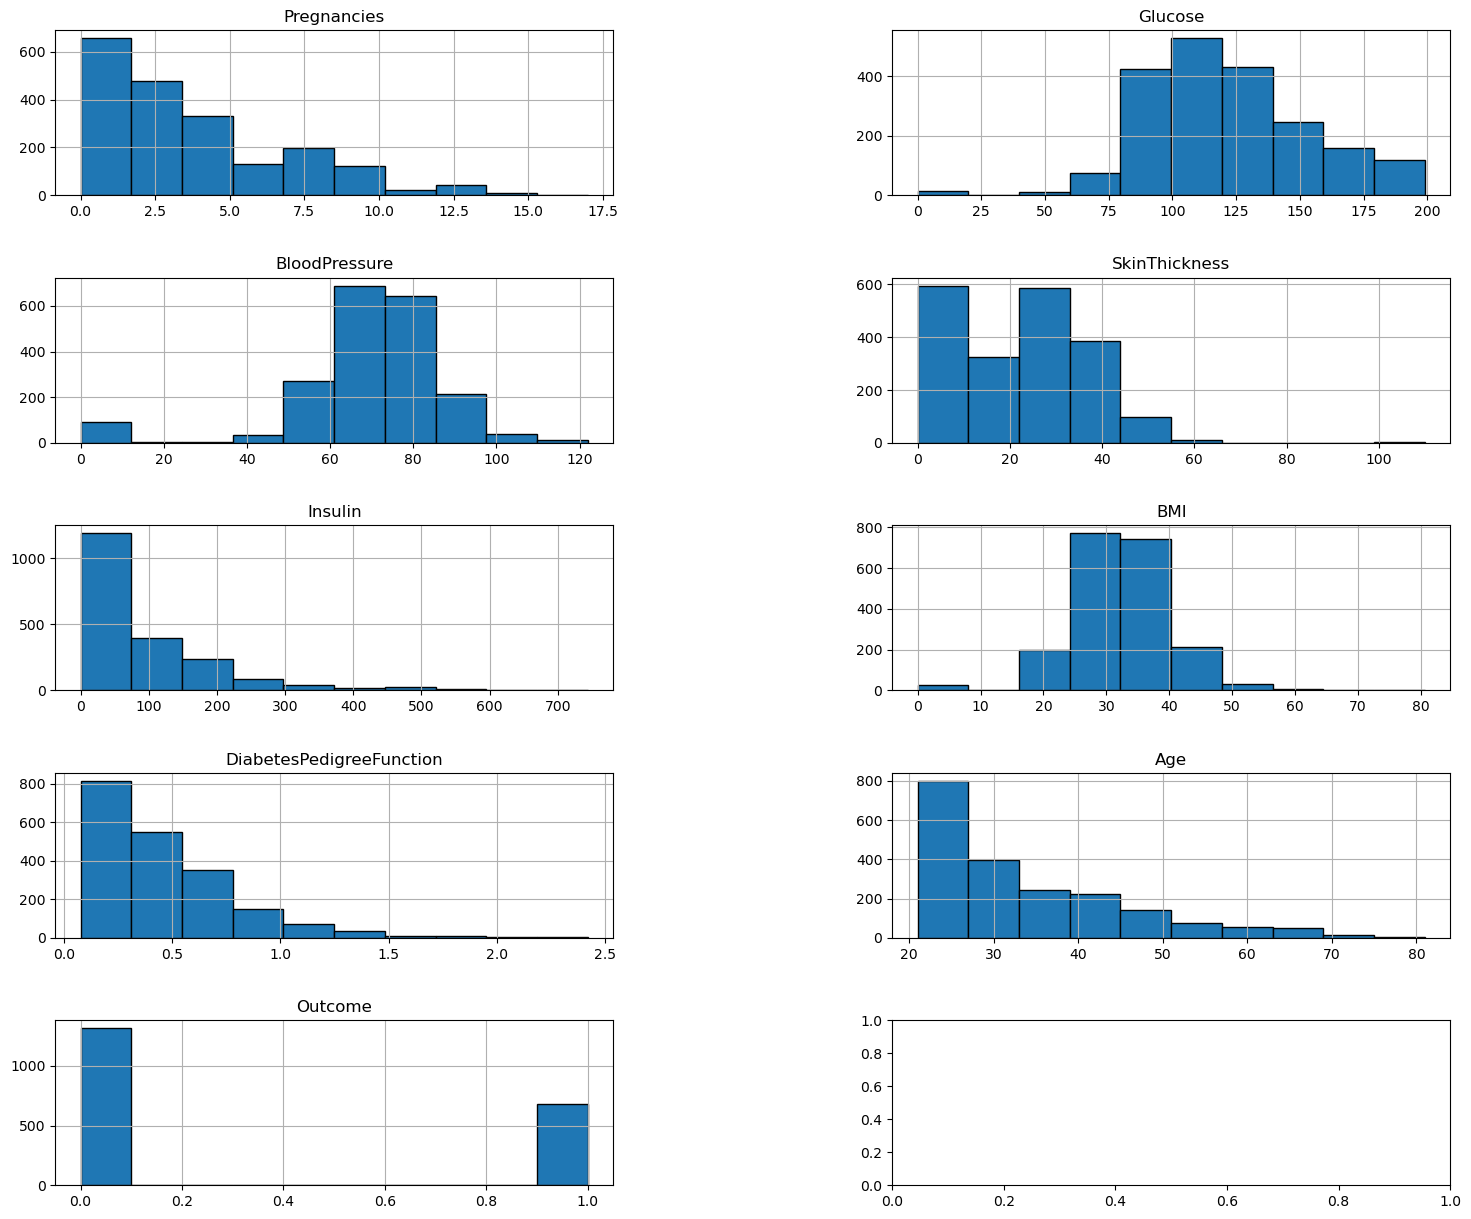

In [37]:
columns=data.columns[:9]
plt.subplots(nrows=(len(columns)+1)//2, ncols=2, figsize=(18,15))
for i,j in itertools.zip_longest(columns,range(len(columns))):
    plt.subplot((len(columns)+1)//2, 2, j+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    data[i].hist(bins=10,edgecolor='black')
    plt.title(i)
plt.show()

In [38]:
#sns.countplot(data.Outcome)

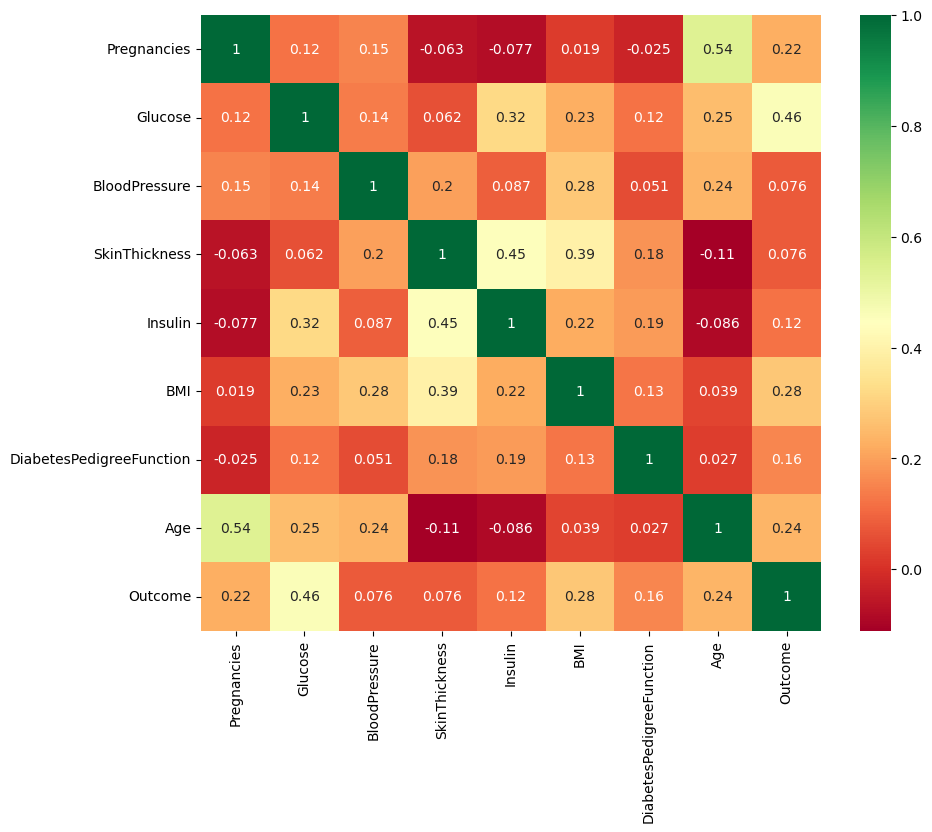

In [39]:
plt.figure(figsize=(10,8))  
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 

In [40]:
columns = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness',  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = data[columns]
X=data.drop('Outcome', axis=1)
y=data["Outcome"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)



Train accuracy: 0.831875
Test accuracy: 0.8175


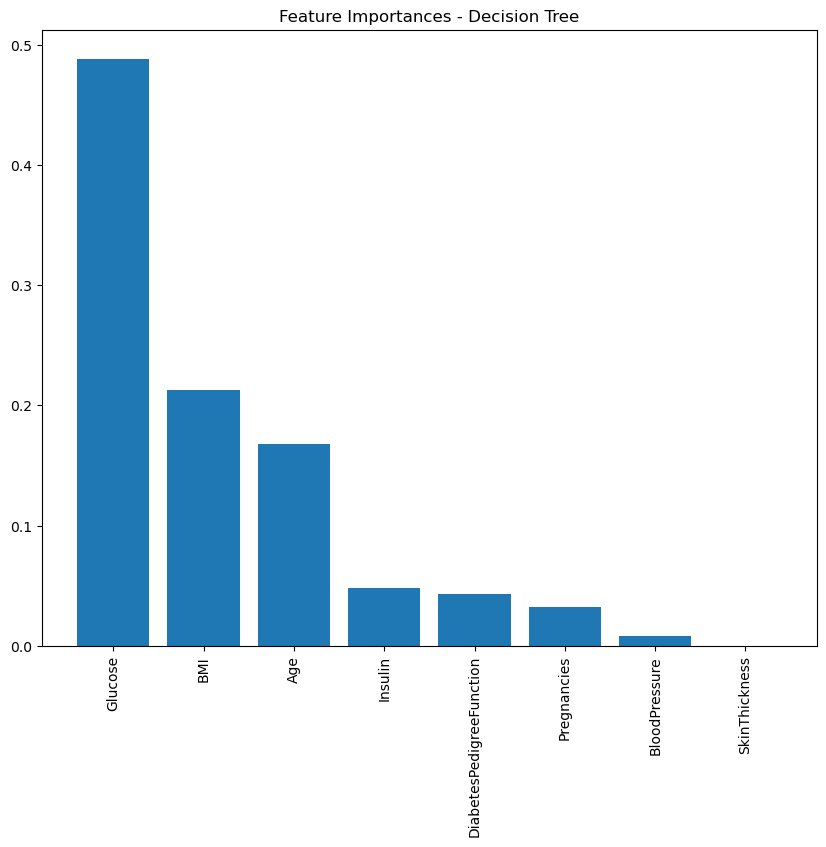

In [41]:
# Decision tree classifier
tree_new = DecisionTreeClassifier(max_depth=5)
tree_new.fit(Xtrain, ytrain)
print('Train accuracy: {}'.format(tree_new.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(tree_new.score(Xtest, ytest)))

# Plot feature importances for decision tree
importances = tree_new.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,8))
plt.title("Feature Importances - Decision Tree")
plt.bar(range(Xtrain.shape[1]), importances[indices])
plt.xticks(range(Xtrain.shape[1]), Xtrain.columns[indices], rotation=90)
plt.show()


Train accuracy: 0.850625
Test accuracy: 0.8225


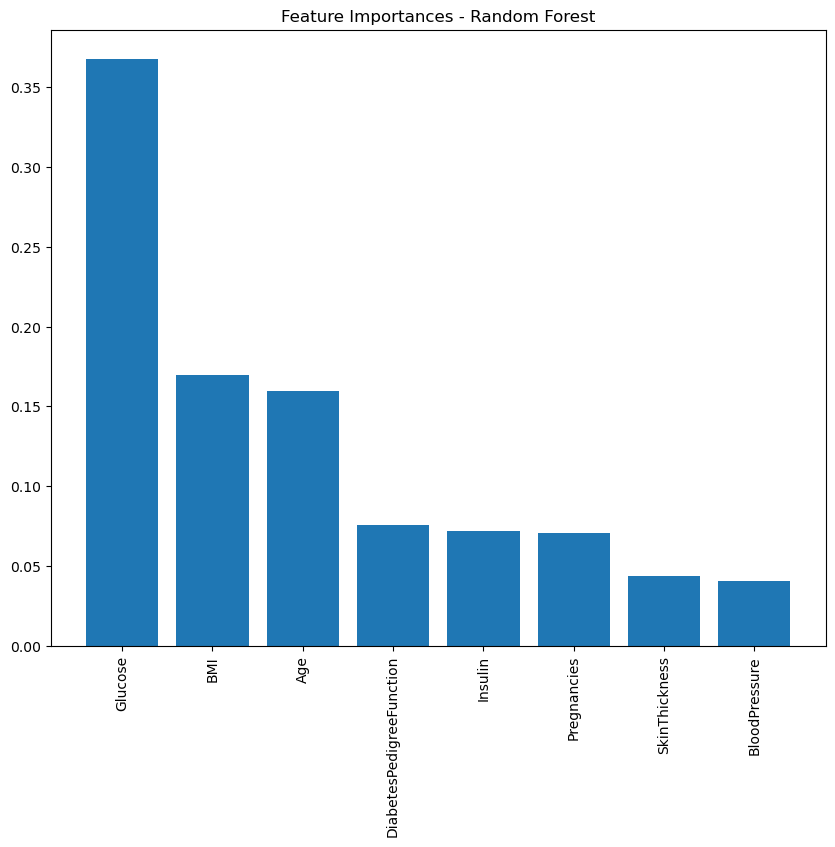

In [42]:
# Random forest classifier
forest = RandomForestClassifier(max_depth=5, n_estimators=200)
forest.fit(Xtrain, ytrain)
print('Train accuracy: {}'.format(forest.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(forest.score(Xtest, ytest)))

# Plot feature importances for random forest
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(Xtrain.shape[1]), importances[indices])
plt.xticks(range(Xtrain.shape[1]), Xtrain.columns[indices], rotation=90)
plt.show()


Train accuracy: 0.82875
Test accuracy: 0.78


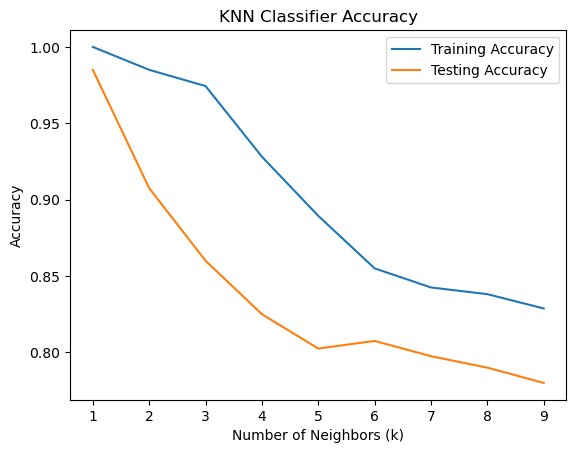

In [43]:
k_range = range(1, 10)
train_scores = []
test_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, ytrain)
    train_scores.append(knn.score(Xtrain, ytrain))
    test_scores.append(knn.score(Xtest, ytest))
print('Train accuracy: {}'.format(knn.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(knn.score(Xtest, ytest)))

# Plot the KNN graph
plt.plot(k_range, train_scores, label='Training Accuracy')
plt.plot(k_range, test_scores, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy')
plt.legend()
plt.show()
